Lab 11: Social Network Analysis 

Kobie Williams 

3/22/2021

The purpose of this lab is to get familiar with basic SNA concepts(graphs, nodes, edges, network metrics) and tools. 

In [2]:
import pandas as pd 


In [3]:
dfNodes = pd.read_csv('https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_nodelist.csv')

In [4]:
dfEdges = pd.read_csv('https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_edgelist.csv')

In [5]:
from IPython import display 
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx


In [6]:
from operator import itemgetter 
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately 

In [7]:
dfEdges.head(5) 

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [8]:
G =nx.Graph() 

In [9]:
edges = [] 

#Loop through te data frame 
for i, row in dfEdges.iterrows(): 
  curr_edge = (row['Source'], row['Target']) 
  edges.append(curr_edge) 

edges 

[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp'),
 ('Peter Collinson', 'John Bartram'),
 ('Peter Collinson', 'James Logan'),
 ('Joseph Wyeth', 'Thomas Ellwood'),
 ('Alexander Skene of Newtyle', 'Lilias Skene'),
 ('Dorcas Erbery', 'James Nayler'),
 ('William Mucklow', 'George Fox'),
 ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
 ('William Dewsbury', 'Edward Burrough'),
 ('William Dewsbury', 'George Fox'),
 ('William Dewsbury', 'John Crook'),
 ('John Audland', 'John Camm'),
 ('John Audland', 'Francis Howgill'),
 ('John Audland', 'Edward Pyott'),
 ('John Audland', 'Charles Marshall'),
 ('John Audland', 'George Fox'),
 

In [10]:
dfNodes.head(5)

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152


In [11]:
nodes = dfNodes['Name']  

In [12]:
nodes

0                    Joseph Wyeth
1      Alexander Skene of Newtyle
2                     James Logan
3                   Dorcas Erbery
4                    Lilias Skene
                  ...            
114                Thomas Ellwood
115               William Simpson
116                 Samuel Bownas
117                   John Perrot
118               Hannah Stranger
Name: Name, Length: 119, dtype: object

In [13]:
G.add_nodes_from(nodes) 
G.add_edges_from(edges) 


In [14]:
print(nx.info(G))

Graph with 119 nodes and 174 edges


In [15]:
#using our df's for Nodes and Edges 

#our empty dictionaries for the attributes 
hist_sig_dict = {} 
gender_dict = {} 
birth_dict = {} 
death_dict = {} 
id_dict = {} 

In [16]:
for node in nodes: #Loop through the list of our data frame
  hist_sig_dict[node[0]] = node[1] 
  gender_dict[node[0]] = node[2] 
  birth_dict[node[0]] = node[3] 
  death_dict[node[0]] = node[4] 
  id_dict[node[0]] = node[5] 

In [17]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance') 
nx.set_node_attributes(G, gender_dict, 'gender') 
nx.set_node_attributes(G, birth_dict, 'birth_year') 
nx.set_node_attributes(G, death_dict, 'death_year') 
nx.set_node_attributes(G, id_dict, 'sdfb_id') 


In [18]:
density = nx.density(G) 
print('Network density:', density)

Network density: 0.02478279447372169


In [19]:
print('Nodes:', list(G.nodes)) 

Nodes: ['Joseph Wyeth', 'Alexander Skene of Newtyle', 'James Logan', 'Dorcas Erbery', 'Lilias Skene', 'William Mucklow', 'Thomas Salthouse', 'William Dewsbury', 'John Audland', 'Richard Claridge', 'William Bradford', 'Fettiplace Bellers', 'John Bellers', 'Isabel Yeamans', 'George Fox the younger', 'George Fox', 'John Stubbs', 'Anne Camm', 'John Camm', 'Thomas Camm', 'Katharine Evans', 'Lydia Lancaster', 'Samuel Clarridge', 'Thomas Lower', 'Gervase Benson', 'Stephen Crisp', 'James Claypoole', 'Thomas Holme', 'John Freame', 'John Swinton', 'William Mead', 'Henry Pickworth', 'John Crook', 'Gilbert Latey', 'Ellis Hookes', 'Joseph Besse', 'James Nayler', 'Elizabeth Hooten', 'George Whitehead', 'John Whitehead', 'William Crouch', 'Benjamin Furly', 'Silvanus Bevan', 'Robert Rich', 'John Whiting', 'Christopher Taylor', 'Thomas Lawson', 'Richard Farnworth', 'William Coddington', 'Thomas Taylor', 'Richard Vickris', 'Robert Barclay', 'Jane Sowle', 'Tace Sowle', 'Leonard Fell', 'Margaret Fell', 'G

In [20]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target='George Whitehead') 
print('Shortest path between Fell and Whitehead:', fell_whitehead_path) 

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [21]:
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


In [22]:
#With a graph of more than one component, we should get a false return 
print(nx.is_connected(G))

#List of components and finding the largest one 
components = nx.connected_components(G)
largest_component = max(components, key=len)

#Creating a subgraph and calculating the diameter 
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)


False
Network diameter of largest component: 8


In [23]:
#Calculating transitivity 
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


In [24]:
#Trying to calculate centrality 

#Calculating degree and adding it as an attribute 
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

#Sorting the dictionary degrees 
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

#Finding the top 20 degrees 
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)



Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


In [25]:
#finding betweenness centrality and eigenvector centrality 
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [26]:
#Sorting betweenness centrality 
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


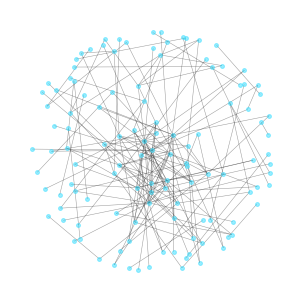

In [27]:
#Trying to visualize a network 
plt.figure(figsize=(4,4)) 

#Calculate the best position for laying out the nodes graphically 
pos = nx.spring_layout(G, k=0.8)

nx.draw(G, pos=pos, with_labels=False,
        node_color='#33ddff', node_size=15,
        edge_color='#333333',alpha=0.5, width=0.5)

# the spring layout contains the position of each node, in case we want to
# visualize one node in particular
#node_0_position = pos[0]
#plt.plot(node_0_position[0], node_0_position[1], 'ro')
#plt.text(node_0_position[0], node_0_position[1], 'Node 0', size='xx-large')
plt.show()




4. a) Nodes tend to cluster together in the Quaker social network. There are a few nodes that have a very high degree meaning that they have lots of connections. They are also known as hubs. 

  b) This is not a very dense network because when we calculate network density we get a number of 0.0248 which is low on a scale of 0 to 1. So the network is sparse. 
  
  c) The five most important people in the network are William Penn, George Fox, James Nayler, George Whitehead, and Margaret Fell. They have the highest network centralities. 

In [28]:
Howgill_Leavens_Path = nx.shortest_path(G, source="Francis Howgill", target='Elizabeth Leavens') 
print('Shortest path between Howgill and Leavens:', Howgill_Leavens_Path) 

Shortest path between Howgill and Leavens: ['Francis Howgill', 'George Fox', 'Margaret Fell', 'Elizabeth Leavens']


E) Degree tells us that these nodes are the hubs in the network whereas betweenness centrality looks at all the shortest paths that pass through a particular node. 

F) We can infer that Elizabeth leavens was not a person who had alot of connections, but was someone who connected two people who otherwise wouldn't be connected. She was a broker 